In [2]:
# main function IMPORT
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import os
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GroupShuffleSplit
from scipy import stats
from zlib import crc32
from sklearn.linear_model import LogisticRegression
pd.options.mode.chained_assignment = None
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')
os.chdir('C:\\acci')
from sklearn.metrics import classification_report

In [3]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 * 32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
#ROC곡선 정의
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('거짓 양성 비율')
    plt.ylabel('진짜 양성 비율')

In [4]:
# 데이터 불러오기 및 전처리
# 0. Data set split
data = pd.read_csv("traffic_1.csv",encoding='CP949')

feature_names_raw = ["acdnt_dd_dc","dfk_code","tmzon_div_1_code","occrrnc_time_code","acdnt_mcode","lrg_violt_1_code",
                     "wether_sttus_code","road_stle_code","wrngdo_vhcle_asort_code","acdnt_age_1_code","sexdstn_div_1_code",
                     "acdnt_age_2_code","sexdstn_div_2_code","rdse_sttus_code","acdnt_year","month"]
feature_names = ["spring","summer","fall","winter","mon","tue","wed","thur","fri","sat","sun",
                 "day","night","h1","h2","h3","h4","h5","h6","h7","h8","h9","h10","h11","h12",
                 "h13","h14","h15","h16","h17","h18","h19","h20","h21","h22","h23","h24",
                 "acm1","acm2","acm3","acm4","acm5","violt1","violt2","violt3","violt4",
                 "violt5","violt6","violt7","violt8","violt9","violt10","violt11","violt12",
                 "weath1","weath2","weath3","weath4","weath5","weath6",
                 "rsty1","rsty2","rsty3","rsty4","rsty5","rsty6","rsty7","rsty8","rsty9","rsty10",
                 "rsty11","rsty12","rsty13","vtype1","vtype2","vtype3","vtype4","vtype5","vtype6","vtype7","vtype8",
                 "age1","male1","female1","age2","male2","female2",
                 "rstat1","rstat2","rstat3","rstat4","rstat5","rstat6","rstat7","rstat8","rstat9"]
label_name = "y_h"
names = ["spring","summer","fall","winter","mon","tue","wed","thur","fri","sat","sun",
                 "day","night","h1","h2","h3","h4","h5","h6","h7","h8","h9","h10","h11","h12",
                 "h13","h14","h15","h16","h17","h18","h19","h20","h21","h22","h23","h24",
                 "acm1","acm2","acm3","acm4","acm5","violt1","violt2","violt3","violt4",
                 "violt5","violt6","violt7","violt8","violt9","violt10","violt11","violt12",
                 "weath1","weath2","weath3","weath4","weath5","weath6",
                 "rsty1","rsty2","rsty3","rsty4","rsty5","rsty6","rsty7","rsty8","rsty9","rsty10",
                 "rsty11","rsty12","rsty13","vtype1","vtype2","vtype3","vtype4","vtype5","vtype6","vtype7","vtype8",
                 "age1","male1","female1","age2","male2","female2",
                 "rstat1","rstat2","rstat3","rstat4","rstat5","rstat6","rstat7","rstat8","rstat9", "y_h"]


In [5]:
data1 = data[names]
from sklearn.decomposition import PCA
pca = PCA(n_components = 43)
data_d = pca.fit_transform(data1)

In [6]:
data_d

array([[ 0.64565585,  0.40640579, -0.79867618, ..., -0.48944046,
         0.05416014, -0.06824386],
       [-0.59845455,  0.56495106, -0.53805827, ..., -0.32366767,
         0.10342609,  0.0451884 ],
       [-1.38421907, -0.18676602,  0.81220753, ...,  0.0142748 ,
        -0.01839765,  0.00484316],
       ...,
       [ 2.20367917,  0.32464573, -0.81847738, ..., -0.01929724,
         0.13256895,  0.06535254],
       [-0.11149532, -0.15562981,  0.85650996, ...,  0.02236524,
         0.01792099,  0.00402762],
       [-2.07183941, -0.69513054, -0.25005283, ..., -0.0209333 ,
        -0.01405924, -0.01806378]])

In [7]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(data, data[label_name]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]
train = strat_train_set[names]
test = strat_test_set[names]
X_train = strat_train_set[feature_names]
y_train = strat_train_set[label_name]
X_test = strat_test_set[feature_names]
y_test = strat_test_set[label_name]
#계층화 됐는지 확인
print(data[label_name].value_counts()/len(data))
print(strat_train_set[label_name].value_counts()/len(strat_train_set))
print(strat_test_set[label_name].value_counts()/len(strat_test_set))
print(len(strat_train_set))
print(len(strat_test_set))
print(len(y_test))

1    0.555954
0    0.444046
Name: y_h, dtype: float64
1    0.555968
0    0.444032
Name: y_h, dtype: float64
1    0.555901
0    0.444099
Name: y_h, dtype: float64
23183
5796
5796


In [5]:
# 데이터 확인
print(X_train.shape)
print(X_train.head())
print(X_test.shape)
print(X_test.head())

(23183, 96)
       spring  summer  fall  winter  mon  tue  wed  thur  fri  sat   ...    \
21672       0       0     0       1    0    0    1     0    0    0   ...     
4633        0       0     0       1    1    0    0     0    0    0   ...     
9440        0       1     0       0    0    0    0     0    0    0   ...     
22410       0       0     0       0    0    1    0     0    0    0   ...     
14169       0       0     0       1    1    0    0     0    0    0   ...     

       female2  rstat1  rstat2  rstat3  rstat4  rstat5  rstat6  rstat7  \
21672        0       1       0       0       0       0       0       0   
4633         0       1       0       0       0       0       0       0   
9440         1       1       0       0       0       0       0       0   
22410        0       1       0       0       0       0       0       0   
14169        1       1       0       0       0       0       0       0   

       rstat8  rstat9  
21672       0       0  
4633        0       0  
94

In [45]:
#splited data export
import csv
train.to_csv("training.csv")
test.to_csv("test.csv")

In [26]:
pd.DataFrame(feature_names).to_csv("C:/acci/feature_names.csv")

In [8]:
#Stratified K-fold
skf = StratifiedKFold(n_splits=10)
#scoring
from sklearn.metrics import roc_auc_score, accuracy_score
ROC_scorer = make_scorer(roc_auc_score, greater_is_better=True)
Accuracy_scorer = make_scorer(accuracy_score, greater_is_better=True)
#scorer 선택
scorer = Accuracy_scorer

In [71]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
consum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(consum >= 0.95) + 1
print(d)
pca = PCA()
pca.fit(X_test)
consum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(consum >= 0.95) + 1
print(d)

43
43


In [ ]:
b = grid_nn_m.predict(X_train_m)
y_scores_m = grid_nn_m.predict_proba(X_train_m)[:,1]
#validation
print("Score of MLPClassifer : ", grid_nn_m.score(X_train_m,y_train))
print("정밀도 : ", precision_score(y_train, b))
print("재현율 : ", recall_score(y_train,b))
print("f1 score : ", f1_score(y_train,b))
print("roc_auc_score : ", roc_auc_score(y_train, y_scores_m))
plot_roc_curve(fpr, tpr, "MLPClassifer")

In [7]:
# -------Logistic Regression Model-------------------------------------------------------------
# 1-(1) 초기화
Model_l = LogisticRegression(C=1e50)
# 1-(2) 학습
Model_l.fit(X_train, y_train)

#해야할 것: 시각화(박스플랏, 밀도그림, ROC곡선)
#이항편차 구하기

LogisticRegression(C=1e+50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
# Evalution
a = Model_l.predict(X_test)
b = Model_l.predict(X_train)
y_scores = Model_l.predict_proba(X_test)[:,1]
y_scores_m = Model_l.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# validation
print("LogisticRegrresionModel")
print("Validation")
print("Score of LRMClassifer(Accuracy) : ", Model_l.score(X_train,y_train))
print("정밀도 : ", precision_score(y_train, b))
print("재현율 : ", recall_score(y_train,b))
print("f1 score : ", f1_score(y_train,b))
print("roc_auc_score : ", roc_auc_score(y_train, y_scores_m))
# (6) Evalution 
#Confusion Matrix
print("CONFUSION MATRIX", confusion_matrix(y_test, a), sep = '\n')
print("Accuracy of LogisticRegresiion : ", Model_l.score(X_test,y_test))
print("정밀도 : ", precision_score(y_test, a))
print("재현율 : ", recall_score(y_test,a))
print("f1 score : ", f1_score(y_test,a))
print("roc_auc_score : ", roc_auc_score(y_test, y_scores))

LogisticRegrresionModel
Validation
Score of LRMClassifer(Accuracy) :  0.6453435707199241
정밀도 :  0.658471986417657
재현율 :  0.7522693769881295
f1 score :  0.7022524806257695
roc_auc_score :  0.6858999876438964
CONFUSION MATRIX
[[1325 1249]
 [ 828 2394]]
Accuracy of LogisticRegresiion :  0.6416494133885439
정밀도 :  0.65715069997255
재현율 :  0.7430167597765364
f1 score :  0.6974508375819374
roc_auc_score :  0.6876520782479814


In [12]:
y_test.to_csv("C:/acci/Logistic/y_obs.csv")
yhat_l = Model_l.predict_proba(X_test)
pd.DataFrame(yhat_l).to_csv("C:/acci/Logistic/yhat.csv")

In [23]:
# Random Forest-----------------------------------------------------------------------------------------------------------------------
# (1) 초기화
RF_ = RandomForestClassifier()
# (2) GridSearch & Parameter 찾기 (Paramter & Scorer Metric 설정)
grid_RF_m = GridSearchCV(RF_, param_grid = {
    'n_estimators': [200],
    'n_jobs': [-1],
    'random_state': [42],
    'max_depth':[10],
    'verbose': [0]
}, 
                         cv=10, scoring = scorer)
# (3) 학습
grid_RF_m.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200], 'n_jobs': [-1], 'random_state': [42], 'max_depth': [10], 'verbose': [0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

RandomForestClassifer
Validation
Best Parameter : {'max_depth': 10, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 42, 'verbose': 0}
Score of MLPClassifer :  0.684035715826252
정밀도 :  0.6703612982241274
재현율 :  0.8493288850958182
f1 score :  0.7493069578014305
roc_auc_score :  0.749788848101671
Evaluation
CONFUSION MATRIX
[[1067 1507]
 [ 598 2624]]
Accuracy of RandomForestClassifer :  0.6368184955141477
정밀도 :  0.63519728879206
재현율 :  0.8144009931719429
f1 score :  0.7137222902216783
roc_auc_score :  0.6838869283003361
<bound method BaseEstimator.get_params of GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=F

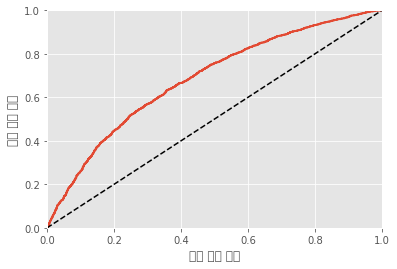

In [42]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
# (4) Predition
yobs = y_test
a = grid_RF_m.predict(X_test)
b = grid_RF_m.predict(X_train)
y_scores = grid_RF_m.predict_proba(X_test)[:,1]
y_scores_m = grid_RF_m.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# (5) validation
print("RandomForestClassifer")
print("Validation")
print("Best Parameter :", grid_RF_m.best_params_)
print("Score of MLPClassifer : ", grid_RF_m.score(X_train,y_train))
print("정밀도 : ", precision_score(y_train, b))
print("재현율 : ", recall_score(y_train,b))
print("f1 score : ", f1_score(y_train,b))
print("roc_auc_score : ", roc_auc_score(y_train, y_scores_m))
# (6) Evalution 
#Confusion Matrix & feature importance
print("Evaluation")
print("CONFUSION MATRIX", confusion_matrix(y_test, a), sep = '\n')
print("Accuracy of RandomForestClassifer : ", grid_RF_m.score(X_test,y_test))
print("정밀도 : ", precision_score(y_test, a))
print("재현율 : ", recall_score(y_test,a))
print("f1 score : ", f1_score(y_test,a))
print("roc_auc_score : ", roc_auc_score(y_test, y_scores))
print(grid_RF_m.get_params)
plot_roc_curve(fpr, tpr, "RandomForestClassifer")
importances = grid_RF_m.best_estimator_.feature_importances_
print(importances)


In [25]:
y_test.to_csv("C:/acci/RandomForest/y_obs.csv")
yhat_RF = grid_RF_m.predict_proba(X_test)
pd.DataFrame(yhat_RF).to_csv("C:/acci/RandomForest/yhat.csv")
pd.DataFrame(importances).to_csv("C:/acci/RandomForest/feature_importances1.csv")

In [125]:
# Extratreees--------------------------------------------------------------------------------------------------------------------------
# (1) 초기화
from sklearn.ensemble import ExtraTreesClassifier
ET_ = ExtraTreesClassifier()
# (2) GridSearch & Parameter 찾기 (Paramter & Scorer Metric 설정)
grid_ET_m = GridSearchCV(ET_, param_grid = {
    'n_estimators': [200],
    'n_jobs': [-1],
    'random_state': [42],
    'verbose': [0],
    'max_depth':[10]
}, cv=10, scoring = scorer)
# (3) 학습
grid_ET_m.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200], 'n_jobs': [-1], 'random_state': [42], 'verbose': [0], 'max_depth': [10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

In [ ]:
yobs.to_csv("C:/acci/Extratrees/y_obs.csv")
yhat_ET = grid_ET_m.predict_proba(X_test)
pd.DataFrame(yhat_ET).to_csv("C:/acci/Extratrees/yhat.csv")
pd.DataFrame(importances).to_csv("C:/acci/Extratrees/feature_importances1.csv")

In [18]:
#GradientBoostingClassifer----------------------------------------------------------------------------------------------------------------
from sklearn.ensemble import GradientBoostingClassifier
# (1) 초기화
GB_ = GradientBoostingClassifier()
# (2) GridSearch & Parameter 찾기 (Paramter & Scorer Metric 설정)
grid_GB_m = GridSearchCV(GB_, param_grid = {
    'n_estimators': [400],
    'random_state': [42],
    'verbose': [0],
    'learning_rate' : [0.01],
    'max_depth' : [5]
}, cv=10, scoring = scorer)
# (3) 학습
grid_GB_m.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [400], 'random_state': [42], 'verbose': [0], 'learning_rate': [0.01], 'max_depth': [5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

GradientBoostingClassifer
Validation
Score of GBClassifer :  0.661346676443946
정밀도 :  0.6676873918253229
재현율 :  0.7781829466987353
f1 score :  0.7187130522016408
roc_auc_score :  0.7137830761114732
GradidentBoostingClassifer
Best Parameter : {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 400, 'random_state': 42, 'verbose': 0}
CONFUSION MATRIX
[[1290 1284]
 [ 766 2456]]
Accuracy of GradidentBoostingClassifer :  0.6463077984817115
정밀도 :  0.6566844919786097
재현율 :  0.7622594661700807
f1 score :  0.7055443837977594
<bound method BaseEstimator.get_params of GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
            

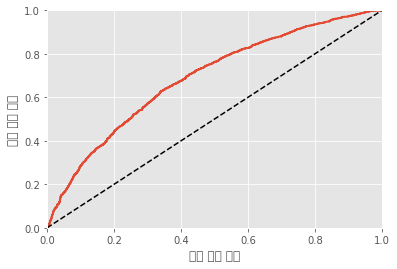

In [41]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
# (4) Predition
yobs = y_test
a = grid_GB_m.predict(X_test)
b = grid_GB_m.predict(X_train)
y_scores = grid_GB_m.predict_proba(X_test)[:,1]
y_scores_m = grid_GB_m.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# (5) validation
print("GradientBoostingClassifer")
print("Validation")
print("Score of GBClassifer : ",grid_GB_m.score(X_train,y_train))
print("정밀도 : ", precision_score(y_train, b))
print("재현율 : ", recall_score(y_train,b))
print("f1 score : ", f1_score(y_train,b))
print("roc_auc_score : ", roc_auc_score(y_train, y_scores_m))
print("GradidentBoostingClassifer")
print("Best Parameter :", grid_GB_m.best_params_)
# (6) Evalution 
#Confusion Matrix & feature importance
print("CONFUSION MATRIX", confusion_matrix(y_test, a), sep = '\n')
print("Accuracy of GradidentBoostingClassifer : ", grid_GB_m.score(X_test,y_test))
print("정밀도 : ", precision_score(y_test, a))
print("재현율 : ", recall_score(y_test,a))
print("f1 score : ", f1_score(y_test,a))
print(grid_GB_m.get_params)
print("roc_auc_score : ", roc_auc_score(y_test, y_scores))
plot_roc_curve(fpr, tpr, "GradidentBoostingClassifer")
importances = grid_GB_m.best_estimator_.feature_importances_
print(importances)


In [20]:
y_test.to_csv("C:/acci/GB/y_obs.csv")
yhat_GB = grid_GB_m.predict_proba(X_test)
pd.DataFrame(yhat_GB).to_csv("C:/acci/GB/yhat.csv")
pd.DataFrame(importances).to_csv("C:/acci/GB/feature_importances1.csv")

In [38]:
#MLP CLASSIFIER 준비 - 출력
X_train.to_csv("C:/acci/MLP/X_train.csv")
X_test.to_csv("C:/acci/MLP/X_test.csv")
# 그다음 R에서 0~1 스케일 변환

In [28]:
#MLP CLASSIFIER - 다시 입력
X_train_m = pd.read_csv("C:/acci/MLP/X_train_m.csv")
X_test_m = pd.read_csv("C:/acci/MLP/X_test_m.csv")

In [51]:
print(X_train_m.shape)
print(X_train_m.head())
print(X_test_m.shape)
print(X_test_m.head())

(23183, 96)
   spring  summer  fall  winter  mon  tue  wed  thur  fri  sat   ...    \
0       0       0     0       1    0    0    1     0    0    0   ...     
1       0       0     0       1    1    0    0     0    0    0   ...     
2       0       1     0       0    0    0    0     0    0    0   ...     
3       0       0     0       0    0    1    0     0    0    0   ...     
4       0       0     0       1    1    0    0     0    0    0   ...     

   female2  rstat1  rstat2  rstat3  rstat4  rstat5  rstat6  rstat7  rstat8  \
0        0       1       0       0       0       0       0       0       0   
1        0       1       0       0       0       0       0       0       0   
2        1       1       0       0       0       0       0       0       0   
3        0       1       0       0       0       0       0       0       0   
4        1       1       0       0       0       0       0       0       0   

   rstat9  
0       0  
1       0  
2       0  
3       0  
4       0  

[

In [79]:
# MLP Classifier--------------------------------------------------------------------------------------------------------------------------
# (1) 초기화
from sklearn.neural_network import MLPClassifier
nn_ = MLPClassifier()
# (2) GridSearch & Parameter 찾기 (Paramter & Scorer Metric 설정)
grid_nn_m = GridSearchCV(nn_, 
                         param_grid = {
                                        'learning_rate_init': [0.01,0.001],
                                        'hidden_layer_sizes': [(5,5),(5,10),(10,5),(10,10),(100,100)],
                             #[(100,100),(100,200),(100,300),(100,400)],
      #                                                         (200,100),(200,200),(200,300),(200,400),
        #                                                       (300,100),(300,200),(300,300),(300,400),
          #                                                     (400,100),(400,200),(400,300),(400,400)],
                                        'activation': ["tanh","relu"],#"sigmoid","tanh"],
                                        'max_iter': [200],
                                        'random_state': [42]
                                      }, scoring = scorer, cv=10)

# (3) 학습
grid_nn_m.fit(X_train_m, y_train)


MLPCLlassifer
CONFUSION MATRIX
[[1376 1198]
 [ 875 2347]]
Score of MLPClassifer :  0.6597075443212699
정밀도 :  0.6749965000699986
재현율 :  0.748157343471177
f1 score :  0.7096964121435142
roc_auc_score :  0.7076798022987236
Best Parameter : {'activation': 'relu', 'hidden_layer_sizes': (5, 5), 'learning_rate_init': 0.001, 'max_iter': 200, 'random_state': 42}
Score of MLPClassifer :  0.6423395445134575
정밀도 :  0.6620592383638928
재현율 :  0.728429546865301
f1 score :  0.6936604108172011
roc_auc_score :  0.6780772679282921


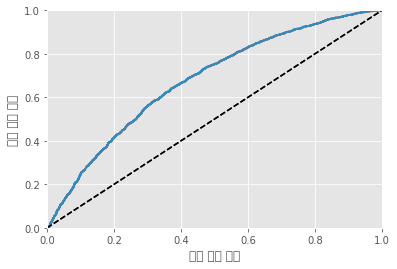

In [80]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
# (4) Predition
yobs = y_test
a = grid_nn_m.predict(X_test_m)
b = grid_nn_m.predict(X_train_m)
y_scores = grid_nn_m.predict_proba(X_test_m)[:,1]
y_scores_m = grid_nn_m.predict_proba(X_train_m)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# (5) validation
print("MLPCLlassifer")
print("Validation")
print("Best Parameter :", grid_nn_m.best_params_)
print("Score of MLPClassifer : ", grid_nn_m.score(X_train_m,y_train))
print("정밀도 : ", precision_score(y_train, b))
print("재현율 : ", recall_score(y_train,b))
print("f1 score : ", f1_score(y_train,b))
print("roc_auc_score : ", roc_auc_score(y_train, y_scores_m))
plot_roc_curve(fpr, tpr, "MLPClassifer")
# (6) Evalution 
#Confusion Matrix & feature importance
print("CONFUSION MATRIX", confusion_matrix(y_test, a), sep = '\n')
print("Score of MLPClassifer : ", grid_nn_m.score(X_test_m,y_test))
print("정밀도 : ", precision_score(y_test, a))
print("재현율 : ", recall_score(y_test,a))
print("f1 score : ", f1_score(y_test,a))
print("roc_auc_score : ", roc_auc_score(y_test, y_scores))
plot_roc_curve(fpr, tpr, "MLPClassifer")


In [31]:
# MLP Classifier--은닉층 하나------------------------------------------------------------------------------------------------------------------------
# (1) 초기화
from sklearn.neural_network import MLPClassifier
nn1_ = MLPClassifier()
# (2) GridSearch & Parameter 찾기 (Paramter & Scorer Metric 설정)
grid_nn1_m = GridSearchCV(nn1_, 
                         param_grid = {
                                        'learning_rate_init': [0.001],
                                        'hidden_layer_sizes': [4],
                             #[(100,100),(100,200),(100,300),(100,400)],
      #                                                         (200,100),(200,200),(200,300),(200,400),
        #                                                       (300,100),(300,200),(300,300),(300,400),
          #                                                     (400,100),(400,200),(400,300),(400,400)],
                                        'activation': ["relu","tanh"],#"sigmoid","tanh"],
                                        'max_iter': [200],
                                        'random_state': [42]
                                      }, scoring = scorer, cv=10)

# (3) 학습
grid_nn1_m.fit(X_train_m, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate_init': [0.001], 'hidden_layer_sizes': [4], 'activation': ['relu', 'tanh'], 'max_iter': [200], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

0.6393909330112583
MLPCLlassifer
Validation
Best Parameter : {'activation': 'tanh', 'hidden_layer_sizes': 4, 'learning_rate_init': 0.001, 'max_iter': 200, 'random_state': 42}
Score of MLPClassifer :  0.6531510158305655
정밀도 :  0.6662323412426279
재현율 :  0.7537435022111878
f1 score :  0.7072913253976921
roc_auc_score :  0.6993065636144206
CONFUSION MATRIX
[[1357 1217]
 [ 829 2393]]
Score of MLPClassifer :  0.6469979296066253
정밀도 :  0.6628808864265928
재현율 :  0.7427063935443824
f1 score :  0.7005269320843092
roc_auc_score :  0.6871011600992979
<bound method BaseEstimator.get_params of GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=

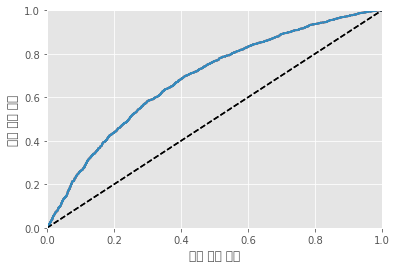

In [39]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
# (4) Predition
yobs = y_test
a = grid_nn1_m.predict(X_test_m)
b = grid_nn1_m.predict(X_train_m)
y_scores = grid_nn1_m.predict_proba(X_test_m)[:,1]
y_scores_m = grid_nn1_m.predict_proba(X_train_m)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
print(grid_nn1_m.best_score_)
# (5) validation
print("MLPCLlassifer")
print("Validation")
print("Best Parameter :", grid_nn1_m.best_params_)
print("Score of MLPClassifer : ", grid_nn1_m.score(X_train_m,y_train))
print("정밀도 : ", precision_score(y_train, b))
print("재현율 : ", recall_score(y_train,b))
print("f1 score : ", f1_score(y_train,b))
print("roc_auc_score : ", roc_auc_score(y_train, y_scores_m))
plot_roc_curve(fpr, tpr, "MLPClassifer")
# (6) Evalution 
#Confusion Matrix & feature importance
print("CONFUSION MATRIX", confusion_matrix(y_test, a), sep = '\n')
print("Score of MLPClassifer : ", grid_nn1_m.score(X_test_m,y_test))
print("정밀도 : ", precision_score(y_test, a))
print("재현율 : ", recall_score(y_test,a))
print("f1 score : ", f1_score(y_test,a))
print("roc_auc_score : ", roc_auc_score(y_test, y_scores))
plot_roc_curve(fpr, tpr, "MLPClassifer")
print(grid_nn1_m.get_params)

In [35]:
y_test.to_csv("C:/acci/MLP/y_obs.csv")
yhat_MLP = grid_nn1_m.predict_proba(X_test)
pd.DataFrame(yhat_MLP).to_csv("C:/acci/MLP/yhat.csv")

In [9]:
# Support Vector Machines----------------------------------------------------------------------------------------------------------------
from sklearn.svm import SVC
# 5-(1) 초기화
SV_ = SVC()
# 5-(2) GridSearch & Parameter 찾기 (Paramter & Scorer Metric 설정)
c_svc = np.array([0.1])
                  #,0.01,0.1,1,10])
#,1,10])28,256,512,1024,2048,4096,8192])
gamma_svc = np.array([0.1])
                      #,0.01,0.1,1,10])
#[3.05176E-05,0.00012207,0.000488281,1,10])
grid_SV_m = GridSearchCV(SV_,
                          param_grid = 
			{
			    'C': c_svc,
			    #'degree':[3], 
# 			   'gamma': gamma_svc, 
  			   'kernel':["rbf"],
                'probability':[True],
                'random_state':[42]
                         #,"rbf"]
#,"rbf" "linear", "poly"]
			}, scoring = scorer
                        )
# 4-(3) 학습
grid_SV_m.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.1]), 'kernel': ['rbf'], 'probability': [True], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

SupportVectorClassifer
Best Parameter : {'C': 0.1, 'kernel': 'rbf', 'probability': True, 'random_state': 42}
Score of SVMClassifer :  0.6392615278436785
정밀도 :  0.6470244282744283
재현율 :  0.7726743734967803
f1 score :  0.7042890986881652
roc_auc_score :  0.6795611082434627
CONFUSION MATRIX
[[1232 1342]
 [ 744 2478]]
Score of SupportVectorClassifer :  0.6400966183574879
정밀도 :  0.6486910994764398
재현율 :  0.7690875232774674
f1 score :  0.7037773359840954
roc_auc_score :  0.6826088681302833
<bound method BaseEstimator.get_params of GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.1]), 'kernel': ['rbf'], 'probability': [True], 'random_state': [42]},
      

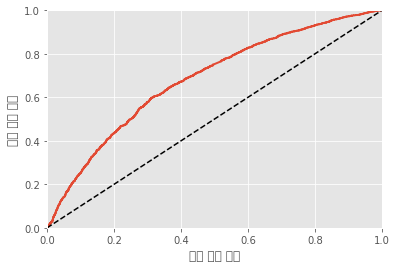

In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
# 4-(4) Predition
a = grid_SV_m.predict(X_test)
b = grid_SV_m.predict(X_train)
y_scores = grid_SV_m.predict_proba(X_test)[:,1]
y_scores_m = grid_SV_m.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# (5) validation
print("SupportVectorClassifer")
print("Best Parameter :", grid_SV_m.best_params_)
print("Score of SVMClassifer : ",grid_SV_m.score(X_train,y_train))
print("정밀도 : ", precision_score(y_train, b))
print("재현율 : ", recall_score(y_train,b))
print("f1 score : ", f1_score(y_train,b))
print("roc_auc_score : ", roc_auc_score(y_train, y_scores_m))
# (6) Evalution 
#Confusion Matrix & feature importance
print("CONFUSION MATRIX", confusion_matrix(y_test, a), sep = '\n')
print("Score of SupportVectorClassifer : ", grid_SV_m.score(X_test,y_test))
print("정밀도 : ", precision_score(y_test, a))
print("재현율 : ", recall_score(y_test,a))
print("f1 score : ", f1_score(y_test,a))
print("roc_auc_score : ", roc_auc_score(y_test, y_scores))
plot_roc_curve(fpr, tpr, "SupportVectorClassifer")
print(grid_SV_m.get_params)

In [11]:
y_test.to_csv("C:/acci/SVM/y_obs.csv")
yhat_SVM = grid_SV_m.predict_proba(X_test)
pd.DataFrame(yhat_SVM).to_csv("C:/acci/SVM/yhat.csv")

In [ ]:
#Feature importance 측정

from sklearn.ensemble import VotingClassifier
Voter = VotingClassifier(estimators=
	[
		('rf',grid_RF_m),('et',grid_ET_m),('gb',grid_GB_m),
        #('mlp',grid_nn_m),('sv',grid_SV_m)
	],
			voting='soft',n_jobs=-1)
Voter.fit(X_train, y_train)
yobs = y_test

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
a = Voter.predict(X_test)
y_scores = Voter.predict_proba(X_test)[:,1]
print("ENSEMBLE")
#Confusion Matrix
print("CONFUSION MATRIX", confusion_matrix(y_test, a), sep = '\n')
#Decision Function
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# Evalution
print("Accuracy of Voting Ensemble : ", Voter.score(X_test,y_test))
print("정밀도 : ", precision_score(y_test, a))
print("재현율 : ", recall_score(y_test,a))
print("f1 score : ", f1_score(y_test,a))
print("roc_auc_score : ", roc_auc_score(y_test, y_scores))
plot_roc_curve(fpr, tpr, "Voting Ensemble")